# **Credit Card Fraud Detection**

### **Objective**
The goal of this project is to develop a machine learning model that can accurately detect fraudulent credit card transactions using historical data. By analyzing transaction patterns, the model should be able to distinguish between normal and fraudulent activity, helping financial institutions flag suspicious behavior early and reduce potential risks.

### **Step 1: Importing necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Step 2: Loading the Data & Cleaning**
- Loading dataset into a pandas DataFrame
- About Dataset:
  * Time: This shows how many seconds have passed since the first
    transaction in the dataset.
  * V1-V28: These are special features created to hide sensitive
    information about the original data.
  * Amount: Transaction amount.
  * Class: Target variable (0 for normal transactions, 1 for
    fraudulent transactions).

In [ ]:
data = pd.read_csv('/content/creditcard.csv')
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,19898.0,15492.416374,10512.066686,0.000000,4536.250000,14796.000000,26220.500000,30633.000000
V1,19898.0,-0.244326,1.889986,-30.552380,-0.959632,-0.302521,1.164473,1.960497
V2,19898.0,0.242420,1.527342,-40.978852,-0.329008,0.220079,0.870117,16.713389
V3,19898.0,0.745774,1.767726,-31.103685,0.309235,0.898672,1.532922,4.101716
V4,19898.0,0.277011,1.466218,-5.172595,-0.636713,0.224608,1.142143,11.927512
V5,19898.0,-0.163264,1.430821,-32.092129,-0.745156,-0.199377,0.341367,34.099309
V6,19898.0,0.092881,1.331029,-23.496714,-0.657306,-0.175434,0.486735,21.393069
V7,19898.0,-0.145279,1.338260,-26.548144,-0.599403,-0.072254,0.448572,34.303177
V8,19898.0,0.022237,1.346813,-41.484823,-0.171779,0.023822,0.279960,20.007208
V9,19898.0,0.636382,1.278839,-7.175097,-0.209565,0.620176,1.409142,10.392889


In [ ]:
null_count = data.isnull().sum()
print(null_count)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
duplicates_record = data.duplicated().sum()
print(duplicates_record)

1081


In [ ]:
data.shape

(284807, 31)

In [ ]:
data = data.drop_duplicates()
data.shape

(283726, 31)

### **Step 3: Exploratory Data Analysis**

In [ ]:
# Calculating the ratio of fraud cases to valid cases to understand how balanced or imbalanced the dataset
fraud_transactions = data[data['Class'] == 1] # Fraudulent transactions (Class == 1)
valid_transactions = data[data['Class'] == 0] # Valid transactions (Class == 0)
outlier_fraction = len(fraud_transactions) / float(len(valid_transactions))
print(outlier_fraction)
print("fraud_transactions: {}".format(len(data[data['Class'] == 1])))
print("valid_transactions: {}".format(len(data[data['Class'] == 0])))

0.0016698852262818046
fraud_transactions: 473
valid_transactions: 283253


In [ ]:
# Exploring Transaction Amounts:
# Help us understand if there are any significant differences in the monetary value of fraudulent transactions.
fraud_transactions.Amount.describe()

,Amount
count,473.000000
mean,123.871860
std,260.211041
min,0.000000
25%,1.000000
50%,9.820000
75%,105.890000
max,2125.870000


In [ ]:
valid_transactions.Amount.describe()

,Amount
count,283253.000000
mean,88.413575
std,250.379023
min,0.000000
25%,5.670000
50%,22.000000
75%,77.460000
max,25691.160000


#### **Correlation Matrix**
The correlation between features using a heatmap using correlation matrix. Help us understanding of how the different features are correlated and which ones may be more relevant for prediction.

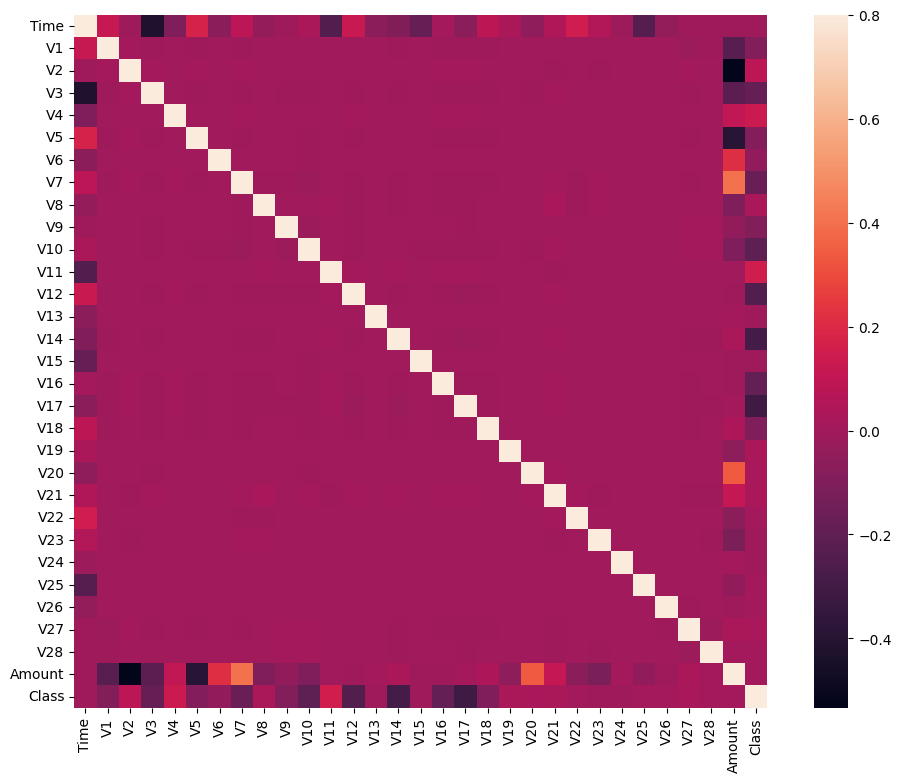

'Most features do not correlate strongly with others but some features like V2 and V5 have a negative correlation with the \nAmount feature. This provides valuable insights into how the features are related to the transaction amounts.'

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()
"""Most features do not correlate strongly with others but some features like V2 and V5 have a negative correlation with the
Amount feature. This provides valuable insights into how the features are related to the transaction amounts."""

### **Step 4: Preparing Data**
Separate the input features (X) and target variable (Y) then split the data into training and testing sets
  * X = data.drop(['Class'], axis = 1) removes the target
    column (Class) from the dataset to keep only the input features.
  * Y = data["Class"] selects the Class column as the
    target variable (fraud or not).
  * X.shape and Y.shape print the number of rows and columns
    in the feature set and the target set.
  * xData = X.values and yData = Y.values convert the
    Pandas DataFrame or Series to NumPy arrays for faster processing.
  * train_test_split(...) splits the data into training
    and testing sets into 80% for training, 20% for testing.
  * random_state=42 ensures reproducibility (same split
    every time you run it).

In [ ]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(283726, 30)
(283726,)


### **Step 5: Building and Training the Model**
Train a Random Forest Classifier to predict fraudulent transactions.

  * from sklearn.ensemble import RandomForestClassifier:
    This imports the RandomForestClassifier from sklearn.ensemble, which is used to create a random forest model for classification tasks.
  * rfc = RandomForestClassifier(): Initializes a new instance
    of the RandomForestClassifier.
  * rfc.fit(xTrain, yTrain): Trains the
    RandomForestClassifier model on the training data (xTrain for features and yTrain for the target labels).
  * yPred = rfc.predict(xTest): Uses the trained model to
    predict the target labels for the test data (xTest), storing the results in yPred.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

### **Step 6: Evaluating the Model**
After training the model we need to evaluate its performance using various metrics such as accuracy, precision, recall, F1-score and the Matthews correlation coefficient.

Model Evaluation Metrics:
Accuracy: 0.9996
Precision: 0.9851
Recall: 0.7333
F1-Score: 0.8408
Matthews Correlation Coefficient: 0.8497


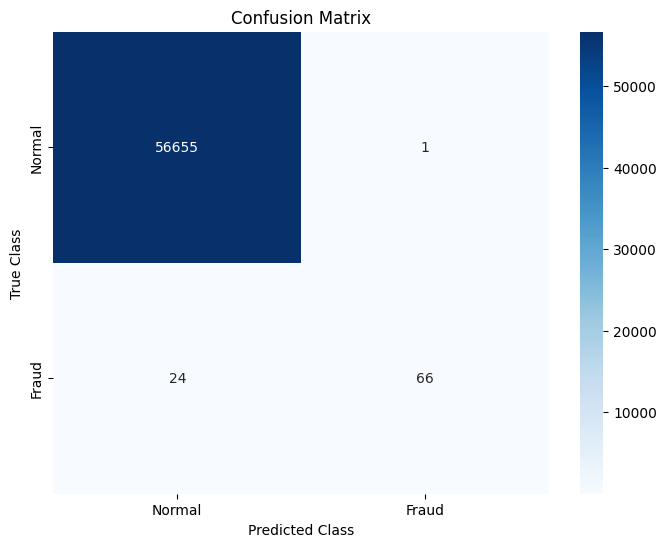

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### **Model Evaluation Metrics:**
The model accuracy is high due to class imbalance so we will have computed precision, recall and f1 score to get a more meaningful understanding. We observe:

  1. Accuracy: 0.9996: Out of all predictions, 99.96% were correct. However, in imbalanced datasets (like fraud detection), accuracy can be misleading i.e. a model that predicts everything as "not fraud" will still have high accuracy.
  2. Precision: 0.9851: When the model predicted "fraud", it was correct 98.51% of the time. High precision means very few false alarms (false positives).
  3. Recall: 0.7333: Out of all actual fraud cases, the model detected 73.33%. This shows how well it catches real frauds. A lower recall means some frauds were missed (false negatives).
  4. F1-Score: 0.8408: A balance between precision and recall. 84.08% is strong and shows the model handles both catching fraud and avoiding false alarms well.
  5. Matthews Correlation Coefficient (MCC): 0.8497: A more balanced score (from -1 to +1) even when classes are imbalanced. A value of 0.8497 is very good, it means the model is making strong, balanced predictions overall.

### **Challenges include:**

* Handling imbalanced datasets where fraud cases are a small fraction of total transactions.
* Ensuring high precision to minimize false positives (flagging a valid transaction as fraud).
* Ensuring high recall to detect as many fraud cases as possible.